![title](UCN.png)

# Introducción a Optimización con Cplex & Python

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo.                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>

> El objetivo de este material es introducir a la optimización utilizando Python y Cplex.
Para mayor información puede visitar el siguiente link [Cplex IBM](https://ibmdecisionoptimization.github.io/tutorials/html/Linear_Programming.html)
.Para realizar gráficas puede revisar el siguiente link [Matplot](https://matplotlib.org)

(Ejemplo basado del Wiston)

### Gepeto Toys Inc. manufactura 2 tipos de jugestes: **Soldados** y **Trenes**.

Un soldado se vende por 27 dólares y usa 10 dólares en materias primas. Cada soldado que se fabrica aumenta la mano de obra variable y los costos generales de Giapetto en 14 dólares. Un tren se vende por 21 dólares y usa 9 dólares en materias primas. Cada tren construido aumenta los costos laborales y generales variables de Giapetto en 10 dólares. La fabricación de soldados y trenes de madera requiere dos tipos de mano de obra calificada: **carpintería** y **acabado**. 

Un soldado requiere 2 horas de trabajo de acabado y 1 hora de trabajo de carpintería. Un tren requiere 1 hora de trabajo de acabado y 1 hora de trabajo de carpintería. Cada semana, Giapetto puede obtener toda la materia prima necesaria, pero solo 100 horas de acabado y 80 horas de carpintería. La demanda de trenes es ilimitada, pero se compran como máximo 40 soldados cada semana. Giapetto quiere maximizar la ganancia semanal (ingresos-costos).

**Formule un modelo matemático de la situación de Giapetto que pueda usarse para maximizar el beneficio semanal de Giapetto.**

### <font color=blue> Modelo de Programación Lineal </font>
\begin{equation}
Max\;Z=27x_1+21x_2-(10x_1+9x_2)-(14x_1+10x_2)
\end{equation}
\begin{equation}
x_1+x_2\leq 80
\end{equation}
\begin{equation}
2x_1+x_2 \leq 100
\end{equation}
\begin{equation}
x_1\leq 40
\end{equation}
\begin{equation}
x_1,x_2\geq0
\end{equation}

Donde $x_1$ es la cantidad de soldados a producir y $x_2$ es la cantidad de trenes a producir.

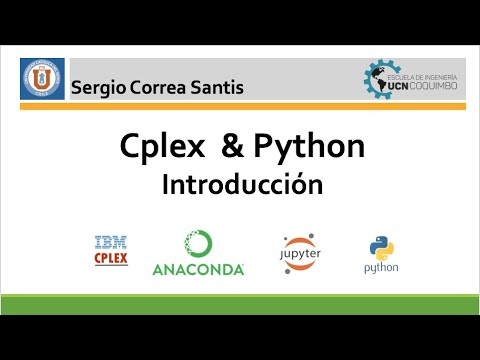

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lTcJlw0iaJ4')

In [2]:
# Importanto Cplex. 
from docplex.mp.model import Model

In [3]:
# Inicializando el modelo
mdl = Model('modelo')

In [4]:
# Creando las variables de decisión - continuas

x1 = mdl.continuous_var(name='x1')
x2 = mdl.continuous_var(name='x2')

### Creando las restricciones

\begin{equation}
x_1+x_2\leq 80
\end{equation}
\begin{equation}
2x_1+x_2 \leq 100
\end{equation}
\begin{equation}
x_1\leq 40
\end{equation}
\begin{equation}
x_1,x_2\geq0
\end{equation}

In [5]:
# Escribiendo las restricciones

mdl.add_constraint(x1+x2 <= 80)
mdl.add_constraint(2*x1+x2 <= 100)
mdl.add_constraint(x1 <= 40)





docplex.mp.LinearConstraint[](x1,LE,40)

### Creando la Función Objetivo
\begin{equation}
Max\;Z=27x_1+21x_2-(10x_1+9x_2)-(14x_1+10x_2)
\end{equation}

In [6]:
# Creando la función objetivo
mdl.maximize(27*x1+21*x2-10*x1-9*x2-14*x1-10*x2)

In [7]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo

Maximize
 obj: 3 x1 + 2 x2
Subject To
 c1: x1 + x2 <= 80
 c2: 2 x1 + x2 <= 100
 c3: x1 <= 40

Bounds
End



In [8]:
solucion = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.01 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual infeasibility =             0.000000
Iteration:     2   Dual objective     =           180.000000


In [9]:
solucion.display()

solution for: modelo
objective: 180.000
x1 = 20.000
x2 = 60.000


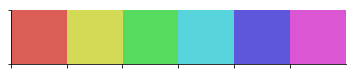

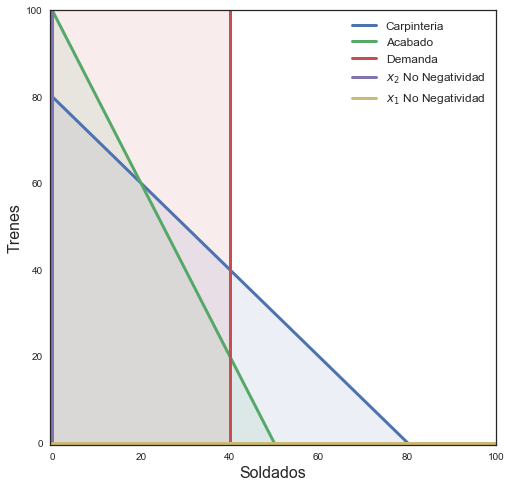

In [10]:
# Aprendiendo a graficar 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x1 = np.linspace(0, 100)

# agregando la restricción de horas de capintería
plt.plot(x1, 80 - x1, lw=3, label='Carpinteria')
plt.fill_between(x1, 0, 80 - x1, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x1, 100 - 2 * x1, lw=3, label='Acabado')
plt.fill_between(x1, 0, 100 - 2 * x1, alpha=0.1)

# agregando la restricción de demanda
plt.plot(40 * np.ones_like(x1), x1, lw=3, label='Demanda')
plt.fill_betweenx(x1, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_2$ No Negatividad')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_1$ No Negatividad')

plt.xlabel('Soldados', fontsize=16)
plt.ylabel('Trenes', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=12)
plt.show()

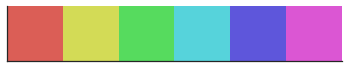

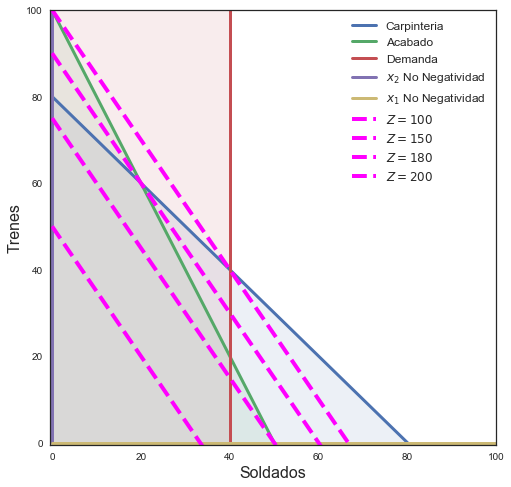

In [11]:
# Aprendiendo a graficar 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x1 = np.linspace(0, 100)

# agregando la restricción de horas de capintería
plt.plot(x1, 80 - x1, lw=3, label='Carpinteria')
plt.fill_between(x1, 0, 80 - x1, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x1, 100 - 2 * x1, lw=3, label='Acabado')
plt.fill_between(x1, 0, 100 - 2 * x1, alpha=0.1)

# agregando la restricción de demanda
plt.plot(40 * np.ones_like(x1), x1, lw=3, label='Demanda')
plt.fill_betweenx(x1, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_2$ No Negatividad')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_1$ No Negatividad')

# agregando la restricción función objetivo
plt.plot(x1, 50 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=100$')
plt.plot(x1, 75 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=150$')
plt.plot(x1, 90 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=180$')
plt.plot(x1, 100 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=200$')


plt.xlabel('Soldados', fontsize=16)
plt.ylabel('Trenes', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=12)
plt.show()

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo.                          
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>